<a href="https://colab.research.google.com/github/nissi00/machine-learning/blob/main/clustering04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Le clustering

Le clustering consiste à regrouper selon un lien (critère) de similarité, une grande quantité de données en plusieurs sous-ensembles appelés clusters. Les éléments contenus dans un cluster sont similaires les uns aux autres, mais différents des éléments des autres clusters.
Contrairement au problème de classification dans lequel la variable cible est définie, ici, les données ne sont pas étiquettées, on ne connait donc pas la sortie. Une fois l'application du cluster terminée, une intervention humaine est nécessaire pour étiquetter les données. 

# Les différents algorithmes de clustering

* K-Means
* Affinity Propagation
* BIRCH
* DBSCAN
* Mini Batch K-Means
* Mean Shift
* OPTICS
* Spectral Clustering
* Gaussian Mixture Model
* Agglomerative Clustering

Tous ne nécessitent pas forcément de connaître au préalable le nombre de clusters

Utilisation de l'estimateur **KMeans**. C'est certainement l'algorithme le plus utilisé pour le clustering. Sa compréhension est assez simple.

Avant son implémentation il faut définir le nombre de clusters. Pour cela il existe les méthodes **elbow** et celle de la **silhouette**. Pour la première, l'on doit définir une plage de valeur pour **k**, puis la méthode se chargera de trouver la valeur optimale de  **k**.

**Explication de l'algorithme KMeans**

Après avoir défini le nombre de clusters, pour chacun des clusters, on initialise la position de son centroÏde dans l'espace. L'algorithme fait ensuite des itérations pour déterminer la position optimale de chaque centroÏde qui minimise la distance entre le centroÏde et chaque point de son cluster.

# Les métiques de clustering

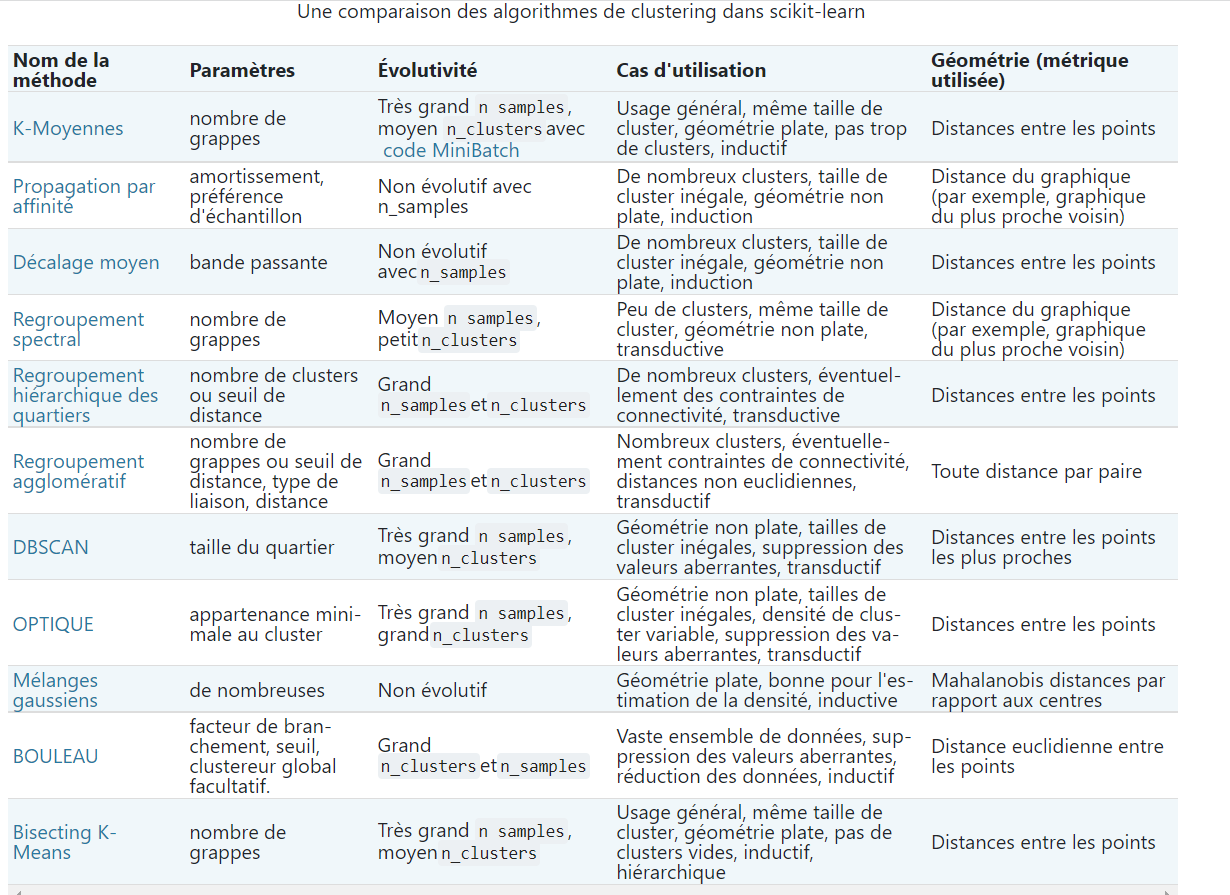

Comme toutes méthodes d'apprentissage automatique le clustering possède des métriques pour mésurer sa performance. Ce sont entre autres:
*  Indice Rand

Cette fonction mésure les similarités (en pourcentage)  entre les valeurs réelles et celle prédites.

* Indice rand ajusté

c'est une version amélioré du premier

* l'information mutuelle (``metrics.adjusted_mutual_info_score``) , Homogénéité (``metrics.homogeneity_score``), complétude et V-mesure, sont bien des métriques propre au problèmes de cludtering.

Les deux premiers seront illustré dans l'application suivante.

Ces données ont été recueillies lors de la campagne de l'an dernier.
La description des données est la suivante ;

* Réponse (cible) - 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon
* ID - ID unique de chaque client
* Année Naissance - Âge du client Réclamation - 1 si le client s'est plaint au cours des 2 dernières années Dt Client - date de la réclamation du client inscription auprès de l'entreprise
Education - niveau d'éducation du
client Marital - état civil du client
* Kidhome - nombre d'enfants en bas âge dans le ménage du client
* Teenhome - nombre d'adolescents dans le ménage du client
Revenu - revenu annuel du ménage du client
* MntFishProducts - le montant dépensé en produits de la pêche au cours des 2 dernières ans
* MntMeatProducts - le montant dépensé en produits carnés au cours des 2 dernières années
* MntFruits - le montant dépensé en produits fruitiers au cours des 2 dernières années
* MntSweetProducts - le montant dépensé en produits sucrés au cours des 2 dernières années
* MntWines - le montant dépensé en produits viticoles au cours des 2 dernières années
* MntGoldProds - le montant dépensé en produits d'or au cours des 2 dernières années ans
* NumDealsPurchases - nombre d'achats effectués avec remise
* NumCatalogPurchases - nombre d'achats effectués via le
catalogue (achat de biens à expédier par la poste)
* NumStorePurchases - nombre d'achats effectués directement en magasin
* NumWebPurchases - nombre d'achats effectués via le site Web de l'entreprise
* NumWebVisitsMonth - nombre de visites sur le site Web de l'entreprise au cours du dernier mois
Récence - nombre de jours depuis le dernier achat

# Application

Nous allons regrouper les consomateurs en tenant compte de ces caractéristiques pour rendre plus judicieux les prochaines campagnes marketing

## Importation des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Exploration des données

In [ ]:
data = pd.read_csv('/content/superstore_data.csv')

In [ ]:
data

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.shape

(2240, 22)

In [ ]:
data.nunique()

Id                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Response                  2
Complain                  2
dtype: int64

## Nettoyage des données

In [ ]:
data=data.drop('Id', axis=1)

### Les valeurs NAN

In [ ]:
data['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
# Remplacer en utilisant la médiane
median = data['Income'].median()
data['Income'].fillna(median, inplace=True)

### features engineering

In [ ]:
data["spent"]=data["MntGoldProds"]+data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntFishProducts"]+ data["MntSweetProducts"] + data["MntGoldProds"]

### L'encodage

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Education', 'Marital_Status', 'Dt_Customer']


In [ ]:
label_data = data.copy()


In [ ]:
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,spent
0,1970,2,2,84835.0,0,0,464,0,189,104,...,189,218,1,4,4,6,1,1,0,1408
1,1961,2,4,57091.0,0,0,462,0,464,5,...,0,37,1,7,3,7,5,1,0,614
2,1958,2,3,67267.0,0,1,403,0,134,11,...,2,30,1,3,2,5,2,0,0,281
3,1967,2,5,32474.0,1,1,161,0,10,0,...,0,0,1,1,0,2,7,0,0,11
4,1989,2,4,21474.0,1,0,598,0,6,16,...,0,34,2,3,1,2,7,1,0,125


### Mis à l'échelle

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import seaborn as sns

In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(label_data)
scaled_ds = pd.DataFrame(scaler.transform(label_data),columns= label_data.columns )
print("All features are now scaled")

All features are now scaled


### Réduction pca

Cette étape n'est pas obligatoire. En effet, la réduction des dimensions en composant principale est une méthode qui consiste entre autre à redéfinir une nouvelle dataset contenant tous les points de notre dataset original mais regrouper en **n** variables où **n** est inférieur au nombre de variables initiale .

ex: orig_data(M_échantillons, y_variables)

  new_data(M_échantillons, z_variables)

  où y_variables > z_variables


Comme toutes réductions elle pert des données mais elle réussit relativement à conserver  une grande partie des données.  

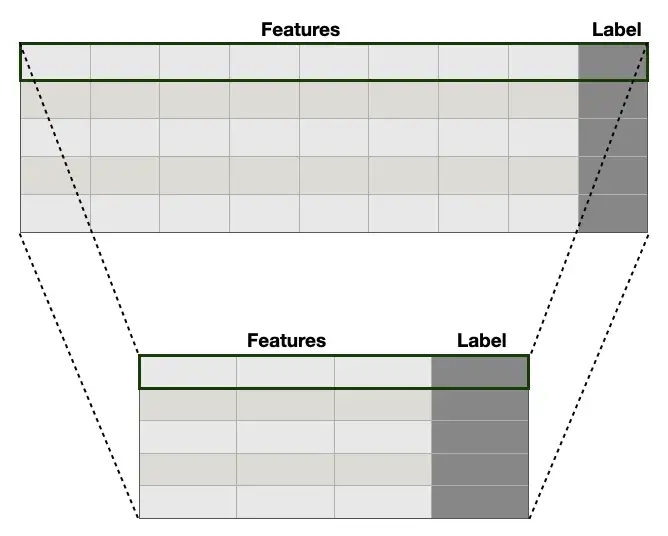

In [ ]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,-7.295751e-17,2.646852,-5.086872,-2.439770,-0.686626,2.301980,7.180137
col2,2240.0,1.903239e-17,1.417988,-3.731258,-1.142365,-0.148317,1.031030,4.851866
col3,2240.0,2.537653e-17,1.179111,-4.255701,-0.812489,-0.027440,0.739614,4.640231


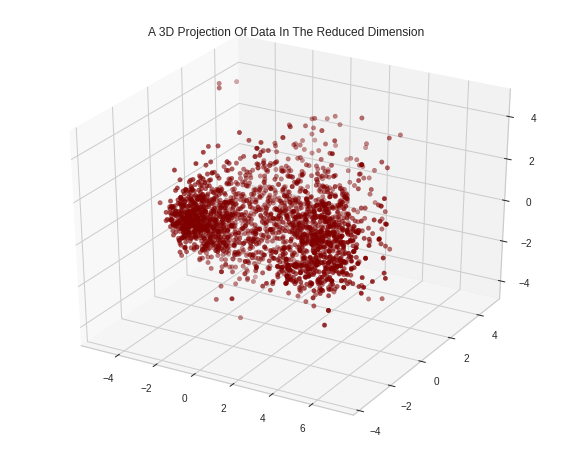

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


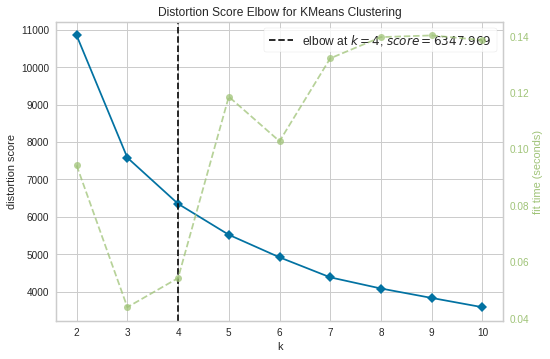

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

In [ ]:
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

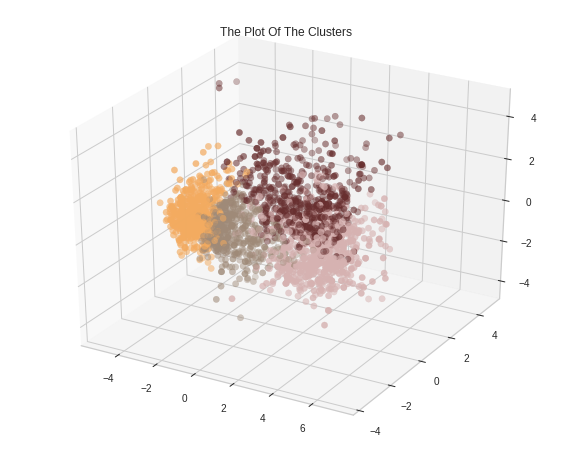

In [ ]:


#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
metrics.adjusted_rand_score(AC.labels_,yhat_AC)

1.0

In [ ]:
AC.labels_

array([1, 0, 2, ..., 2, 1, 0])

In [ ]:
yhat_AC

array([1, 0, 2, ..., 2, 1, 0])

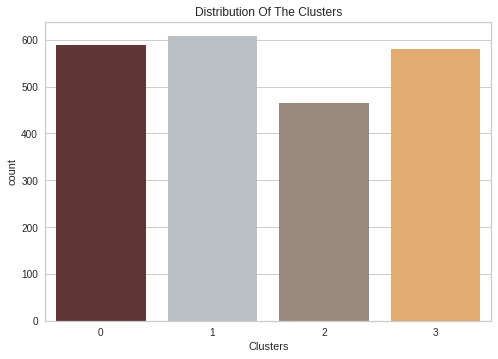

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
data.isnull().sum()

In [ ]:
data["Income"].nunique

<bound method IndexOpsMixin.nunique of 0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64>

In [ ]:
plt.rcParams["figure.figsize"] = (12, 12)

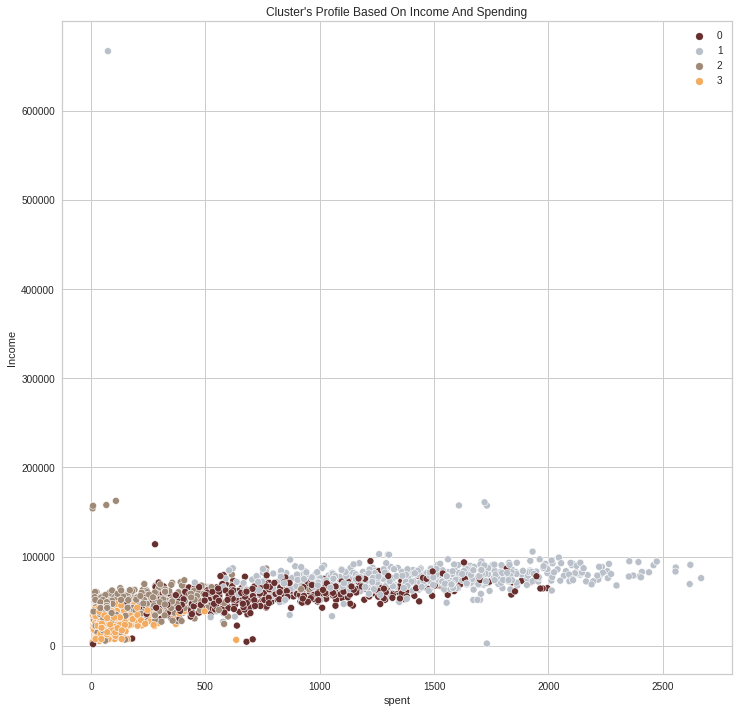

In [ ]:
pl = sns.scatterplot(data = data,x=data["spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

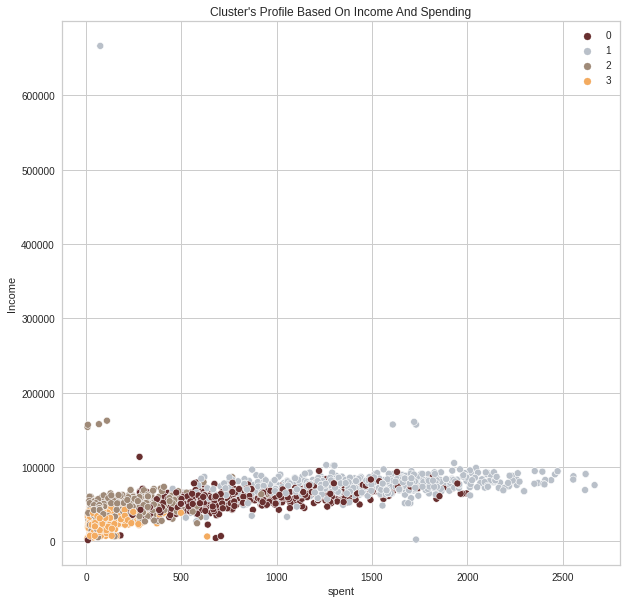

In [ ]:
pl = sns.scatterplot(data = data,x=data["spent"], y=data["Income"],hue=data["Clusters"],sizes=0.2, palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


## Etiquettage de nos données 

**Comment étiquetter?**

Du fait que nous nous trouvons dans une situation d'apprentissage non supervisé, après l'exécution de notre modèle il convient donc d'étiquetter nos données. Pour cela  en fonction du problème posé on considère deux variables "importantes" qui sont à même de répondre à nos questions , on visualise leur distribution en référence à nos prédictions, comme ci- dessus.


**Explication de notre choix**

Dans notre cas on souhaite concevoir une offre marketting qui réponde de manière efficiente aux besoins des consomateurs.
Un choix judicieux serais donc de considérer le revenu et les dépenses comme variables de décision et d'observer la distribution l'une par rapport à l'autre tout simplement parce que dans la vie courante les dépenses d'un individu son conditionner aux revenus propres.

le groupe 3 : revenu faibles, faibles dépenses

le groupe 0 : revenus moyens,  faibles dépenses

le groupe 2 : revenus moyens,  dépenses moyennes

le groupe 3 : revenus élevés,  dépenses élevées

Après l'étiquettage on peut faire d'autre visualisations pour rendre le plus éfficient possible nos prises de décision en faisant un profilage adéquat de la clientèle.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


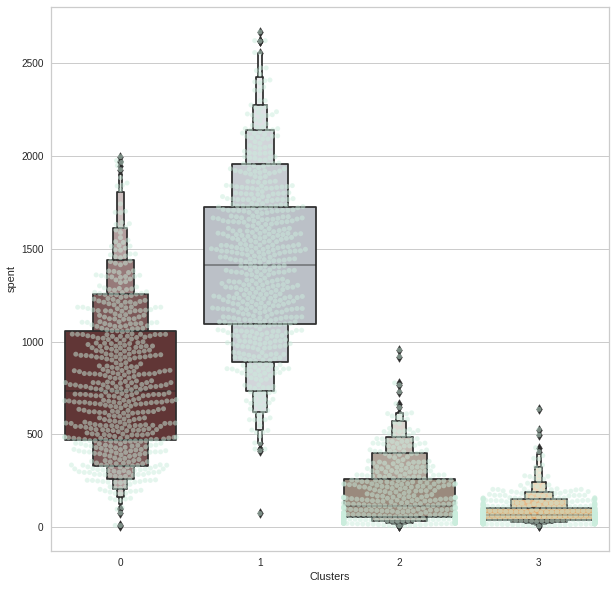

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["spent"], palette=pal)
plt.show()

<Figure size 720x720 with 0 Axes>

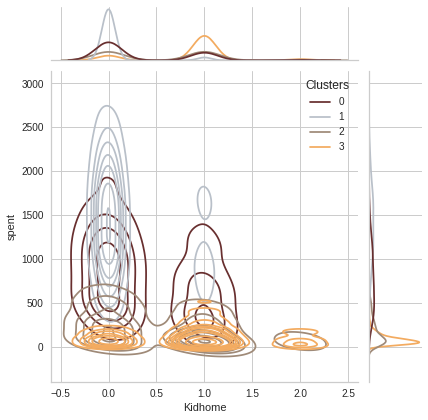

<Figure size 720x720 with 0 Axes>

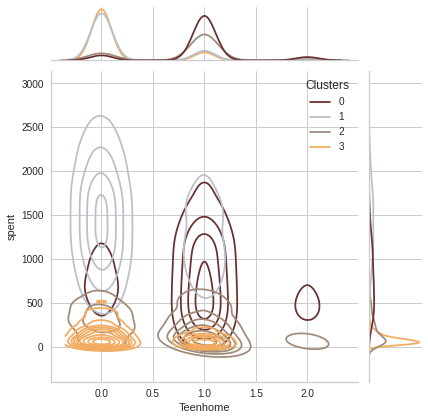

In [ ]:
Personal = [ "Kidhome","Teenhome"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

<---- [classification](https://colab.research.google.com/drive/1clvVvJNhTnH0bIhGFy8U7Hfdq9tjyA0H?usp=sharing)


[réseau de neurones](https://colab.research.google.com/drive/1q08y_Br4e2lJTHCDQ9zlYBbgFXVgNKcD) ---->